# Create initial and boundary conditions for BGC of ACCESS-OM2*

### A few notes:
1. initial conditions come from GLODAPv2 2016 for no3, dic, ta, o2 (all in umol kg-1), and FeMIP median for fe (mol L-1).
2. create extrapolated input files to avoid missing values over the ocean in the interpolated fields using cdo fillmiss.
3. wombat wants these fields in the units of mmol m-3 (no3,adic,dic,alk,o2 using *1.025), umol m-3 (fe using *1e9). 


### extrapolate the input fields.

In [173]:
%%bash

#GLODAP
cdo -O fillmiss input/GLODAPv2.2016b_MappedClimatologies/GLODAPv2.2016b.NO3.nc input/fillmiss/GLODAPv2.2016b.NO3_fillmiss.nc
cdo -O fillmiss input/GLODAPv2.2016b_MappedClimatologies/GLODAPv2.2016b.oxygen.nc input/fillmiss/GLODAPv2.2016b.oxygen_fillmiss.nc
cdo -O fillmiss input/GLODAPv2.2016b_MappedClimatologies/GLODAPv2.2016b.TAlk.nc input/fillmiss/GLODAPv2.2016b.TAlk_fillmiss.nc
cdo -O fillmiss input/GLODAPv2.2016b_MappedClimatologies/GLODAPv2.2016b.TCO2.nc input/fillmiss/GLODAPv2.2016b.TCO2_fillmiss.nc

#FEMIP
cdo -O fillmiss input/FEMIP_model_median_iron_2016.nc input/fillmiss/FEMIP_model_median_iron_2016_fillmiss.nc


['Warning (find_time_vars): Time variable >time< not found!',
 'Error (cdf_create): input/fillmiss/GLODAPv2.2016b.NO3_fillmiss.nc: Permission denied',
 'cdf_create        : ncid = -1  mode = 4096  chunksizehint = 0 file = input/fillmiss/GLODAPv2.2016b.NO3_fillmiss.nc',
 '',
 'Warning (find_time_vars): Time variable >time< not found!',
 'cdo    fillmiss: Processed 8 variables over 1 timestep [2.67s 123MB].',
 'Warning (find_time_vars): Time variable >time< not found!',
 'cdo    fillmiss: Processed 8 variables over 1 timestep [2.57s 123MB].',
 'Warning (find_time_vars): Time variable >time< not found!',
 'cdo    fillmiss: Processed 8 variables over 1 timestep [2.55s 123MB].',
 'cdo    fillmiss: Processed 1 variable over 1 timestep [0.72s 7306MB].']

### load relevant modules

In [1]:
from scipy import *
from pylab import *
from numpy import *
import xarray as xr
from dask.distributed import Client,LocalCluster
client = Client()
client

Client Scheduler: tcp://127.0.0.1:38935 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 30.06 GB


### load target grids (three resolutions)

In [2]:
ds_1deg = xr.open_dataset('1deg/ocean_grid_xyz.nc')
ds_1deg

<xarray.Dataset>
Dimensions:      (nv: 2, st_ocean: 50, time: 1, xt_ocean: 360, yt_ocean: 300)
Coordinates:
  * st_ocean     (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * time         (time) object 2018-02-13 00:00:00
  * xt_ocean     (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean     (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Dimensions without coordinates: nv
Data variables:
    temp         (time, st_ocean, yt_ocean, xt_ocean) float32 ...
    time_bounds  (time, nv) timedelta64[ns] ...
Attributes:
    filename:   ocean_month.nc
    title:      ACCESS-OM2-BGC
    grid_type:  mosaic
    grid_tile:  1
    history:    Thu Jun  3 09:48:07 2021: ncks -d time,1 -v temp /g/data/ik11...
    NCO:        netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net,...

In [3]:
ds_025deg = xr.open_dataset('025deg/ocean_grid_xyz.nc')
ds_025deg

<xarray.Dataset>
Dimensions:      (nv: 2, st_ocean: 50, time: 1, xt_ocean: 1440, yt_ocean: 1080)
Coordinates:
  * st_ocean     (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * time         (time) object 2018-02-13 00:00:00
  * xt_ocean     (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean     (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
Dimensions without coordinates: nv
Data variables:
    temp         (time, st_ocean, yt_ocean, xt_ocean) float32 ...
    time_bounds  (time, nv) timedelta64[ns] ...
Attributes:
    filename:   ocean_month.nc
    title:      ACCESS-OM2
    grid_type:  mosaic
    grid_tile:  1
    history:    Thu Jun  3 09:48:57 2021: ncks -d time,1 -v temp /g/data/ik11...
    NCO:        netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net,...

In [4]:
ds_01deg = xr.open_dataset('01deg/ocean_grid_xyz.nc')
ds_01deg

<xarray.Dataset>
Dimensions:      (nv: 2, st_ocean: 75, time: 1, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * st_ocean     (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time         (time) object 2011-01-02 12:00:00
  * xt_ocean     (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean     (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Dimensions without coordinates: nv
Data variables:
    temp         (time, st_ocean, yt_ocean, xt_ocean) float32 ...
    time_bounds  (time, nv) timedelta64[ns] ...
Attributes:
    filename:   ocean-3d-temp-1-daily-mean-ym_2011_01.nc
    title:      ACCESS-OM2-01
    grid_type:  mosaic
    grid_tile:  1
    history:    Thu Jun  3 09:43:18 2021: ncks -d time,1 -v temp /g/data/ik11...
    NCO:        netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net,...

## begin interpolation!

In [20]:
res_list = ['1']
glodap_list = ['IRON','TAlk','TCO2','NO3','oxygen']
wombat_list = ['fe', 'alk', 'dic', 'no3', 'o2']

for ir in range(size(res_list)):
    
    for it in range(size(glodap_list)):

        #iron data comes from FEMIP
        if glodap_list[it] == 'IRON':
            ds_in = xr.open_dataset('input/fillmiss/FEMIP_model_median_iron_2016_fillmiss.nc')
            #rename the coordinates to the MOM coordinate names to enable interpolation.
            ds_in = ds_in.rename(({'LON':'xt_ocean', 'LAT':'yt_ocean', 'DEPTH':'st_ocean'}))              
        else:
            ds_in = xr.open_dataset('input/fillmiss/GLODAPv2.2016b.'+glodap_list[it]+'_fillmiss.nc')
            ds_in = ds_in.rename(({'lon':'xt_ocean', 'lat':'yt_ocean', 'depth_surface':'st_ocean'}))
        
        #first convert from the GLODAP lon coordiante system (20-380, weird) to the standard system (0-360)
        #retain lon values less than 360, otherwiise subtract 360
        ds_in['xt_ocean'] = ds_in['xt_ocean'].where(ds_in['xt_ocean']<360,ds_in['xt_ocean']-360)
        #retain lon values greater than 0, otherwise add 360
        ds_in['xt_ocean'] = ds_in['xt_ocean'].where(ds_in['xt_ocean']>0,ds_in['xt_ocean']+360)

        #now convert to the MOM lon coordinate system, which spans from -280 to 80 (weird)
        #retain lon values less than 80, otherwise subtract 360
        ds_in['xt_ocean'] = ds_in['xt_ocean'].where(ds_in['xt_ocean']<80,ds_in['xt_ocean']-360)
        #retain lon values greater than -280, otherwise add 360
        ds_in['xt_ocean'] = ds_in['xt_ocean'].where(ds_in['xt_ocean']>-280,ds_in['xt_ocean']+360)

        #the vertical coordinate (depth_surface) in GLODAPv2.2016b is wrong (it is index, not depth values).
        #derive depth from FEMIP iron data.
        ds_tmp = xr.open_dataset('input/fillmiss/FEMIP_model_median_iron_2016_fillmiss.nc')
        ds_in['st_ocean'] = ds_tmp['DEPTH']    


        if res_list[ir] == '1':
            ds_tar = ds_1deg.copy()
        elif res_list[ir] == '025':
            ds_tar = ds_025deg.copy()
        elif res_list[ir] == '01':
            ds_tar = ds_01deg.copy()

        #interpolation

        ds_tar[glodap_list[it]] = ds_in[glodap_list[it]].interp_like(ds_tar,method='nearest')
        #some interpolated values are NaNs, so interpolate_na with the following options to fill in NaNs.
        #dim='st_ocean' is essential. 'xt_ocean' produces NaNs.
        #method='nearest' is essential. 'linear' gives extreme values.
        #fill_value='extrapolate' is essential. without it, still NaNs exist.
        ds_tar[glodap_list[it]] = ds_tar[glodap_list[it]].interpolate_na(dim='st_ocean',method='nearest',fill_value="extrapolate")
        print(['input: ',ds_in[glodap_list[it]].mean(),ds_in[glodap_list[it]].min(),ds_in[glodap_list[it]].max()])
        print(['output: ',ds_tar[glodap_list[it]].mean(),ds_tar[glodap_list[it]].min(),ds_tar[glodap_list[it]].max()])
        #set negative values to zero (negative values exist in NO3 input) 
        ds_tar[glodap_list[it]] = ds_tar[glodap_list[it]].where(ds_tar[glodap_list[it]]>0,0)
        #set land to zero
        ds_tar[glodap_list[it]] = ds_tar[glodap_list[it]].where(ds_tar['temp']==ds_tar['temp'],0)
        #conversion from umol kg-1 to mmol m-3
        ds_tar[glodap_list[it]] = ds_tar[glodap_list[it]]*1.025
        ds_tar[glodap_list[it]] = ds_tar[glodap_list[it]].transpose('time','st_ocean','yt_ocean','xt_ocean')
        #rename to what wombat wants.
        ds_tar = ds_tar.rename(({glodap_list[it]:wombat_list[it], 'xt_ocean':'xaxis_1', 'yt_ocean':'yaxis_1', 'st_ocean':'zaxis_1', 'time':'Time'}))    
        ds_tar[wombat_list[it]].to_netcdf('tmp/'+wombat_list[it]+'_1deg.nc',unlimited_dims='Time',encoding={wombat_list[it]:{'zlib': True,'complevel': 9}})
        ds_tar = ds_tar.drop_vars([wombat_list[it]])

 
        

['input: ', <xarray.DataArray 'IRON' ()>
array(5.46499738e-10), <xarray.DataArray 'IRON' ()>
array(5.71562964e-13), <xarray.DataArray 'IRON' ()>
array(7.53020216e-09)]
['output: ', <xarray.DataArray 'IRON' ()>
array(5.32383831e-10), <xarray.DataArray 'IRON' ()>
array(4.99476846e-12), <xarray.DataArray 'IRON' ()>
array(3.24463891e-09)]
['input: ', <xarray.DataArray 'TAlk' ()>
array(2333.00293613), <xarray.DataArray 'TAlk' ()>
array(1069.45556641), <xarray.DataArray 'TAlk' ()>
array(2659.83081055)]
['output: ', <xarray.DataArray 'TAlk' ()>
array(2370.82411155), <xarray.DataArray 'TAlk' ()>
array(1069.45556641), <xarray.DataArray 'TAlk' ()>
array(2636.93603516)]
['input: ', <xarray.DataArray 'TCO2' ()>
array(2196.5897632), <xarray.DataArray 'TCO2' ()>
array(1019.1619873), <xarray.DataArray 'TCO2' ()>
array(2402.47729492)]
['output: ', <xarray.DataArray 'TCO2' ()>
array(2253.4091221), <xarray.DataArray 'TCO2' ()>
array(1097.44848633), <xarray.DataArray 'TCO2' ()>
array(2400.30932617)]
['in

### merge the variables into a single file.

In [28]:
%%bash

cd tmp
for ir in 1 025 01
do
    #merge into a single file (ncecat did not work). because -O flag does not work, i remove the existing file first.
    rm bgc_init_${ir}deg.nc
    cdo -merge *_${ir}deg.nc bgc_init_${ir}deg.nc
    #copy dic as adic
    ncap2 -O -s "adic=dic" bgc_init_${ir}deg.nc bgc_init_${ir}deg.nc
    #create constant fields for other variables
    ncap2 -O -s "det=(dic>0)*(0.01)" bgc_init_${ir}deg.nc bgc_init_${ir}deg.nc
    ncap2 -O -s "phy=det" bgc_init_${ir}deg.nc bgc_init_${ir}deg.nc
    ncap2 -O -s "zoo=det" bgc_init_${ir}deg.nc bgc_init_${ir}deg.nc
    ncap2 -O -s "caco3=det" bgc_init_${ir}deg.nc bgc_init_${ir}deg.nc

done


Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
cdo    merge: Processed 5 variables over 5 timesteps [12.38s 126MB].


## boundary conditions derived from existing 1deg input.

### atmospheric co2. one for IAF and one for RYF.
0. prescribe annual mean and global mean data.
1. follow omip2 protocol until 2014. from 2015-2020, use the global average data from https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_gl.txt

In [32]:
from cftime import DatetimeNoLeap

In [33]:
#combined atmospheric co2 data for input from 1850-2020.
#OMIP2 protocol for 1850-2014.
#NOAA GML DATA for 2015-2020.
atmco2 = [284.32, 284.45, 284.60, 284.73, 284.85, 284.94, 285.05, 285.20, 285.37, 285.54, 285.74, 285.93, 286.10, 286.27, 286.44, 286.61, 286.78, 286.95, 287.10, 287.22, 287.35, 287.49, 287.66, 287.86, 288.06, 288.29, 288.52, 288.75, 288.99, 289.22, 289.47, 289.74, 290.02, 290.26, 290.51, 290.80, 291.10, 291.41, 291.76, 292.11, 292.46, 292.82, 293.17, 293.48, 293.79, 294.08, 294.36, 294.65, 294.95, 295.30, 295.67, 296.01, 296.32, 296.65, 296.95, 297.29, 297.66, 298.10, 298.52, 298.94, 299.38, 299.83, 300.35, 300.91, 301.42, 301.94, 302.48, 303.01, 303.45, 303.81, 304.25, 304.60, 304.94, 305.27, 305.63, 305.81, 305.95, 306.18, 306.33, 306.49, 306.62, 306.82, 307.09, 307.40, 307.78, 308.23, 309.01, 309.76, 310.29, 310.85, 311.36, 311.81, 312.17, 312.39, 312.41, 312.38, 312.39, 312.49, 312.52, 312.63, 312.82, 313.01, 313.34, 313.73, 314.09, 314.41, 314.70, 314.99, 315.34, 315.81, 316.62, 317.30, 318.04, 318.65, 319.33, 319.82, 320.88, 321.48, 322.39, 323.25, 324.78, 325.40, 327.35, 329.91, 330.76, 330.83, 331.54, 333.35, 335.01, 336.60, 338.70, 340.06, 340.64, 342.27, 344.01, 345.46, 346.90, 348.77, 351.28, 352.89, 354.07, 355.35, 356.23, 356.92, 358.25, 360.24, 362.00, 363.25, 365.93, 367.84, 369.12, 370.67, 372.83, 375.41, 376.99, 378.91, 381.01, 382.60, 384.74, 386.28, 388.72, 390.94, 393.02, 395.72, 397.55, 399.65, 403.09, 405.22, 407.61, 410.07, 412.46]
yrsco2 = arange(1850,2020+1)


In [34]:
#IAF spans from 1957 to 2020
date_iaf = []
for it in arange(1957,2020+1):
    date_iaf.append(DatetimeNoLeap(it,7,1))



In [58]:
res_list = ['1','025','01']

for ir in range(size(res_list)):
    if res_list[ir] == '1':
        ds_tar = ds_1deg.copy()
    elif res_list[ir] == '025':
        ds_tar = ds_025deg.copy()
    elif res_list[ir] == '01':
        ds_tar = ds_01deg.copy()

    ds_tar = ds_tar.drop_dims('st_ocean')
    ds_tar = ds_tar.drop_vars(['time','time_bounds'])
    ds_tar = ds_tar.rename(({'xt_ocean':'grid_x_T', 'yt_ocean':'grid_y_T'}))

    #RYF first
    #RYF only has two dates (the same concentration is used throughout the simulation.)    
    date_ryf = [
        DatetimeNoLeap(1800,7,1),
        DatetimeNoLeap(2101,7,1)
    ]    
    co2_3d = zeros((size(date_ryf),size(ds_tar.grid_y_T),size(ds_tar.grid_x_T)))
    #take the average of co2 between 1990 and 1991. at least this is consistent with the forcing.
    co2_3d[:,:,:] = mean(atmco2[1990-1850:1991+1-1850])
    ds_tar = ds_tar.assign_coords({"time":date_ryf})
    ds_tar['co2'] = xr.DataArray(co2_3d,dims=['time','grid_y_T','grid_x_T'])
    ds_tar.to_netcdf('tmp/co2_ryf_'+res_list[ir]+'deg.nc',unlimited_dims='time',encoding={'co2':{'_FillValue': None},'time':{'_FillValue':None,'dtype':'float64'}})
    
    ds_tar = ds_tar.drop_vars(['co2','time'])
    
    #IAF next
    date_iaf = []
    for it in range(1957,2020+1):
        date_iaf.append(DatetimeNoLeap(it,7,1))    
    co2_3d = zeros((size(date_iaf),size(ds_tar.grid_y_T),size(ds_tar.grid_x_T)))
    for it in range(1957,2020+1):
        co2_3d[it-1957,:,:] = atmco2[it-1850]
    ds_tar = ds_tar.assign_coords({"time":date_iaf})
    ds_tar['co2'] = xr.DataArray(co2_3d,dims=['time','grid_y_T','grid_x_T'])
    ds_tar.to_netcdf('tmp/co2_iaf_'+res_list[ir]+'deg.nc',unlimited_dims='time',encoding={'co2':{'_FillValue': None},'time':{'_FillValue':None,'dtype':'float64'}})


### Next bgc parameter input (bgc_param)

In [ ]:
res_list = ['1','025','01']

for ir in range(size(res_list)):
    if res_list[ir] == '1':
        ds_tar = ds_1deg.copy()
    elif res_list[ir] == '025':
        ds_tar = ds_025deg.copy()
    elif res_list[ir] == '01':
        ds_tar = ds_01deg.copy()

    ds_tar['temp'] = ds_tar['temp'].isel(st_ocean=0,drop=True)
    ds_tar = ds_tar.drop_dims('st_ocean')
    #ds_tar = ds_tar.drop_vars(['time','time_bounds'])
    ds_tar = ds_tar.rename(({'xt_ocean':'grid_x_T', 'yt_ocean':'grid_y_T'}))

    ds_tar.to_netcdf('tmp/bgc_param_'+res_list[ir]+'deg.nc',unlimited_dims='time',encoding={'co2':{'_FillValue': None},'time':{'_FillValue':None,'dtype':'float64'}})


In [63]:
ds_tar = ds_1deg.copy()
ds_tar['temp'] = ds_tar['temp'].isel(st_ocean=0,drop=True)
ds_tar

<xarray.Dataset>
Dimensions:      (nv: 2, st_ocean: 50, time: 1, xt_ocean: 360, yt_ocean: 300)
Coordinates:
  * st_ocean     (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * time         (time) object 2018-02-13 00:00:00
  * xt_ocean     (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean     (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Dimensions without coordinates: nv
Data variables:
    temp         (time, yt_ocean, xt_ocean) float32 ...
    time_bounds  (time, nv) timedelta64[ns] 96213 days 01:16:18.871345152 962...
Attributes:
    filename:   ocean_month.nc
    title:      ACCESS-OM2-BGC
    grid_type:  mosaic
    grid_tile:  1
    history:    Thu Jun  3 09:48:07 2021: ncks -d time,1 -v temp /g/data/ik11...
    NCO:        netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net,...

In [ ]:
bgc_param.nc, dust_om2.nc, csiro_bgc_sediment.res.nc

# 20210607. Old example/test for reference.

### NO3

### load the input data

In [5]:
ds_in = xr.open_dataset('input/fillmiss/GLODAPv2.2016b.NO3_fillmiss.nc')
ds_in

<xarray.Dataset>
Dimensions:     (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon         (lon) float64 20.5 21.5 22.5 23.5 ... 376.5 377.5 378.5 379.5
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: depth_surface, snr
Data variables:
    NO3         (depth_surface, lat, lon) float64 ...
    NO3_error   (depth_surface, lat, lon) float64 ...
    Input_mean  (depth_surface, lat, lon) float64 ...
    Input_std   (depth_surface, lat, lon) float64 ...
    Input_N     (depth_surface, lat, lon) float64 ...
    NO3_relerr  (depth_surface, lat, lon) float64 ...
    SnR         (snr) float64 ...
    CL          (snr) float64 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          CF-1.6
    history:              Mon Jun 07 15:32:02 2021: cdo -O fillmiss input/GLO...
    Description:          1 X 1 global mapped field of nitrate from the GLODA...
    Created:              Created by Siv K. Lauvset on 12-May-2016 18:41:01
    Institution name:     University of Bergen
    Contact information:  siv.lauvset@uib.no; are.olsen@uib.no
    Citation:             Cite as: Lauvset, Siv K., Key, Robert M., Olsen, Ar...
    Comment:              Ttza2hhod0eend0s ai2eLlt  a iufucosivonilsr,neer gs...
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

### convert the input coordinate system to the MOM coordinate system for longtude (-280 to 80, instead of 0-360)
Be careful not to over-do this step, because it overwrites the existing loaded lon and lat. If you need to re-do this step, make sure you re-load the input file (re-run the previous step).

In [6]:
#first convert from the GLODAP lon coordiante system (20-380, weird) to the standard system (0-360)
#retain lon values less than 360, otherwiise subtract 360
ds_in['lon'] = ds_in['lon'].where(ds_in['lon']<360,ds_in['lon']-360)
#retain lon values greater than 0, otherwise add 360
ds_in['lon'] = ds_in['lon'].where(ds_in['lon']>0,ds_in['lon']+360)

#now convert to the MOM lon coordinate system, which spans from -280 to 80 (weird)
#retain lon values less than 80, otherwise subtract 360
ds_in['lon'] = ds_in['lon'].where(ds_in['lon']<80,ds_in['lon']-360)
#retain lon values greater than -280, otherwise add 360
ds_in['lon'] = ds_in['lon'].where(ds_in['lon']>-280,ds_in['lon']+360)
ds_in.lon

<xarray.DataArray 'lon' (lon: 360)>
array([20.5, 21.5, 22.5, ..., 17.5, 18.5, 19.5])
Coordinates:
  * lon      (lon) float64 20.5 21.5 22.5 23.5 24.5 ... 15.5 16.5 17.5 18.5 19.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees east
    axis:           X

### make sure that the lon coordinate system goes from -280 to 80 as expected.

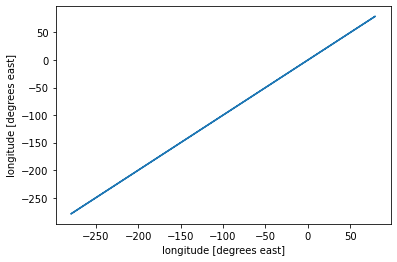

In [7]:
ds_in.lon.plot()

### Rename the coordinates to match with the MOM coordinate names. Needed for interpolation.

In [7]:
#rename the coordinates to the MOM coordinate names to enable interpolation.
ds_in = ds_in.rename(({'lon':'xt_ocean', 'lat':'yt_ocean', 'depth_surface':'st_ocean'}))

### check to make sure renaming is done correctly.

In [9]:
ds_in

<xarray.Dataset>
Dimensions:     (snr: 1, st_ocean: 33, xt_ocean: 360, yt_ocean: 180)
Coordinates:
  * xt_ocean    (xt_ocean) float64 20.5 21.5 22.5 23.5 ... 16.5 17.5 18.5 19.5
  * yt_ocean    (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: snr, st_ocean
Data variables:
    NO3         (st_ocean, yt_ocean, xt_ocean) float64 ...
    NO3_error   (st_ocean, yt_ocean, xt_ocean) float64 ...
    Input_mean  (st_ocean, yt_ocean, xt_ocean) float64 ...
    Input_std   (st_ocean, yt_ocean, xt_ocean) float64 ...
    Input_N     (st_ocean, yt_ocean, xt_ocean) float64 ...
    NO3_relerr  (st_ocean, yt_ocean, xt_ocean) float64 ...
    SnR         (snr) float64 10.0
    CL          (snr) float64 7.0
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          CF-1.6
    history:              Mon Jun 07 11:57:02 2021: cdo -O fillmiss input/GLO...
    Description:          1 X 1 global mapped field of nitrate from the GLODA...
    Created:              Created by Siv K. Lauvset on 12-May-2016 18:41:01
    Institution name:     University of Bergen
    Contact information:  siv.lauvset@uib.no; are.olsen@uib.no
    Citation:             Cite as: Lauvset, Siv K., Key, Robert M., Olsen, Ar...
    Comment:              Ttza2hhod0eend0s ai2eLlt  a iufucosivonilsr,neer gs...
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

## now interpolate to the three resolutions. 
1. apply land-sea mask after interpolation. 
2. multiply by 1.025 to convert from umol kg-1 to mmol m-3.
3. reorder the dimensions.
4. save to tmp folder to avoid data loss.

### 1deg

In [25]:
%%timeit -r 1
ds_1deg['NO3'] = ds_in['NO3'].interp_like(ds_1deg)
ds_1deg['NO3'] = ds_1deg['NO3'].interpolate_na()
#ds_1deg['NO3'] = ds_1deg['NO3'].where(ds_1deg['temp']==ds_1deg['temp'],nan)
ds_1deg['NO3'] = ds_1deg['NO3']*1.025
#ds_1deg['NO3'] = ds_1deg['NO3'].transpose('time','st_ocean','yt_ocean','xt_ocean')
ds_1deg['NO3'].to_netcdf('tmp/NO3_1deg.nc')

NotImplementedError: dim is a required argument

In [60]:
ds_1deg['NO3'] = ds_in['NO3'].interp_like(ds_1deg,method='nearest')
ds_1deg['NO3'] = ds_1deg['NO3'].interpolate_na(dim='st_ocean',method='nearest',fill_value="extrapolate")
ds_1deg['NO3'] = ds_1deg['NO3'].where(ds_1deg['temp']==ds_1deg['temp'],nan)
ds_1deg['NO3'] = ds_1deg['NO3']*1.025
ds_1deg['NO3'] = ds_1deg['NO3'].transpose('time','st_ocean','yt_ocean','xt_ocean')


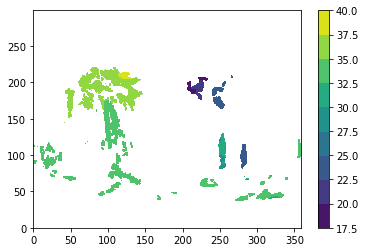

In [61]:
contourf(ds_1deg['NO3'][0,-1,:,:]);colorbar()

### 025deg

In [11]:
%%timeit -r 1
ds_025deg['NO3'] = ds_in['NO3'].interp_like(ds_025deg)
ds_025deg['NO3'] = ds_025deg['NO3'].where(ds_025deg['temp']==ds_025deg['temp'],nan)
ds_025deg['NO3'] = ds_025deg['NO3']*1.025
ds_025deg['NO3'] = ds_025deg['NO3'].transpose('time','st_ocean','yt_ocean','xt_ocean')
ds_025deg['NO3'].to_netcdf('tmp/NO3_025deg.nc')

6.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### 01 deg 
(not timing with %timeit because it blows up, but it took about 60 sec according to my watch).

In [12]:
ds_01deg['NO3'] = ds_in['NO3'].interp_like(ds_01deg)
ds_01deg['NO3'] = ds_01deg['NO3'].where(ds_01deg['temp']==ds_01deg['temp'],nan)
ds_01deg['NO3'] = ds_01deg['NO3']*1.025
ds_1deg['NO3'] = ds_1deg['NO3'].transpose('time','st_ocean','yt_ocean','xt_ocean')
ds_1deg['NO3'].to_netcdf('tmp/NO3_1deg.nc')

### check the interpolated field

In [11]:
ds_1deg['NO3']

<xarray.DataArray 'NO3' (time: 1, st_ocean: 50, yt_ocean: 300, xt_ocean: 360)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * time      (time) object 2018-02-13 00:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


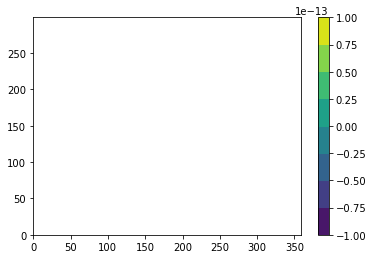

In [21]:
contourf(ds_1deg['NO3'][0,10,:,:]);colorbar()

In [170]:
ds_01deg['NO3'] = ds_in['NO3'].interp_like(ds_01deg)

In [171]:
ds_01deg['NO3'] = ds_01deg['NO3'].where(ds_01deg['temp']==ds_01deg['temp'],nan)

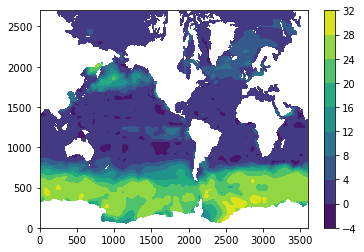

In [172]:
contourf(ds_01deg['NO3'][0,:,:,0]);colorbar()

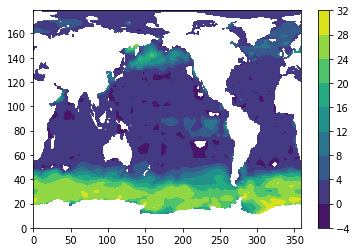

In [75]:
contourf(ds_in['NO3'][0,:,:]);colorbar()

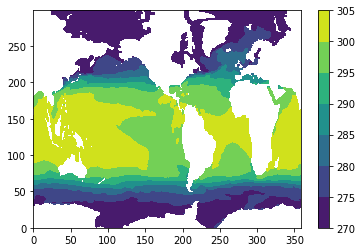

In [80]:
contourf(ds_1deg['temp'][0,0,:,:]);colorbar()

In [186]:
%%time
ds_1deg

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


<xarray.Dataset>
Dimensions:      (nv: 2, st_ocean: 50, time: 1, xt_ocean: 360, yt_ocean: 300)
Coordinates:
  * st_ocean     (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * time         (time) object 2018-02-13 00:00:00
  * xt_ocean     (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean     (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Dimensions without coordinates: nv
Data variables:
    temp         (time, st_ocean, yt_ocean, xt_ocean) float32 ...
    time_bounds  (time, nv) timedelta64[ns] 96213 days 01:16:18.871345152 962...
Attributes:
    filename:   ocean_month.nc
    title:      ACCESS-OM2-BGC
    grid_type:  mosaic
    grid_tile:  1
    history:    Thu Jun  3 09:48:07 2021: ncks -d time,1 -v temp /g/data/ik11...
    NCO:        netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net,...